In [1]:

import json, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

HOME_DIR = '/home/ckchang/ApproxInfer'
data_dir = os.path.join(HOME_DIR, 'data/nyc_taxi_2015-07-01_2015-09-30')
feature_path = os.path.join(data_dir, 'features')

In [49]:
df_labels = pd.read_csv(os.path.join(feature_path, 'trips_labels.csv'))
df_feature_1h = pd.read_csv(os.path.join(feature_path, 'trips_features_qcs1-day.csv'))
df = df_labels.join(df_feature_1h.set_index('trip_id'), on='trip_id')
df.head()

,trip_id,trip_distance,fare_amount,tip_amount,extra,total_amount,passenger_count,avg_dist,var_dist,min_dist,...,max_tip,avg_extra,var_extra,min_extra,max_extra,avg_total,var_total,min_total,max_total,cnt
0,1202933108,1.6,6.50,0.00,0.5,7.80,0,1.600000,0.000000,1.6,...,0.00,0.500000,0.000000,0.5,0.5,7.800000,0.00000,7.8,7.80,1
1,1202966950,0.0,26.46,5.45,0.0,32.71,0,0.800000,0.640000,0.0,...,5.45,0.250000,0.062500,0.0,0.5,20.255000,155.12704,7.8,32.71,2
2,1201973599,12.3,0.00,0.00,0.0,0.30,0,4.633333,29.815554,0.0,...,5.45,0.166667,0.055556,0.0,0.5,13.603333,191.90735,0.3,32.71,3
3,1200233126,1.6,7.50,1.65,0.0,9.95,0,3.875000,24.086874,0.0,...,5.45,0.125000,0.046875,0.0,0.5,12.690000,146.43303,0.3,32.71,4
4,1202933148,0.8,5.50,3.00,0.0,9.30,0,3.260000,20.782398,0.0,...,5.45,0.100000,0.040000,0.0,0.5,12.012000,118.98515,0.3,32.71,5


In [50]:
df.describe()

,trip_id,trip_distance,fare_amount,tip_amount,extra,total_amount,passenger_count,avg_dist,var_dist,min_dist,...,max_tip,avg_extra,var_extra,min_extra,max_extra,avg_total,var_total,min_total,max_total,cnt
count,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,...,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07,1.999243e+07
mean,1.210000e+09,7.108318e+00,1.311442e+01,1.684789e+00,3.194181e-01,1.624246e+01,1.693414e+00,7.036107e+00,2.687335e+07,2.631346e-05,...,2.066738e+02,3.182875e-01,2.490233e-01,1.003130e-05,4.459941e+01,1.624973e+01,9.711670e+03,2.186182e-01,2.992269e+03,1.374865e+05
std,5.773514e+06,5.259325e+03,9.554442e+01,2.595536e+00,5.052527e-01,9.586972e+01,1.342473e+00,1.550480e+01,1.249336e+08,1.393443e-02,...,1.718361e+02,8.661742e-02,4.887477e-01,1.478082e-02,1.531747e+02,9.108718e-01,1.229435e+05,8.085574e-01,3.017871e+04,9.794913e+04
min,1.200000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,1.205000e+09,1.040000e+00,6.500000e+00,0.000000e+00,0.000000e+00,8.760000e+00,1.000000e+00,2.971704e+00,1.368088e+01,0.000000e+00,...,1.000000e+02,2.260297e-01,7.978879e-02,0.000000e+00,1.000000e+00,1.573680e+01,1.710345e+02,0.000000e+00,3.726300e+02,4.850500e+04
50%,1.210000e+09,1.790000e+00,9.500000e+00,1.100000e+00,0.000000e+00,1.180000e+01,1.000000e+00,3.148597e+00,1.618341e+01,0.000000e+00,...,1.500000e+02,3.569689e-01,1.478468e-01,0.000000e+00,1.300000e+00,1.609867e+01,1.836200e+02,0.000000e+00,5.003000e+02,1.159580e+05
75%,1.215000e+09,3.300000e+00,1.500000e+01,2.260000e+00,5.000000e-01,1.780000e+01,2.000000e+00,3.442253e+00,2.077680e+01,0.000000e+00,...,2.777700e+02,3.738895e-01,1.564594e-01,0.000000e+00,2.500000e+00,1.656981e+01,2.083033e+02,0.000000e+00,7.282900e+02,2.439010e+05
max,1.220064e+09,1.211200e+07,4.102669e+05,8.500000e+02,6.384200e+02,4.102677e+05,9.000000e+00,3.287897e+02,1.626120e+09,2.581000e+01,...,8.500000e+02,6.555000e+01,3.846949e+00,6.555000e+01,6.384200e+02,1.066190e+03,1.721586e+06,1.066190e+03,4.102677e+05,2.900640e+05


In [51]:
corr = df.corr()
corr

,trip_id,trip_distance,fare_amount,tip_amount,extra,total_amount,passenger_count,avg_dist,var_dist,min_dist,...,max_tip,avg_extra,var_extra,min_extra,max_extra,avg_total,var_total,min_total,max_total,cnt
trip_id,1.000000,-3.283244e-04,0.001077,0.006807,-0.003835,0.001302,-0.004007,-0.117631,-0.101192,-1.171104e-03,...,-0.018058,-0.000778,-0.112724,-6.176908e-04,-0.073196,0.140551,0.093831,-0.028244,0.096926,0.015975
trip_distance,-0.000328,1.000000e+00,0.000102,0.000714,0.011457,0.000194,-0.000336,0.002925,0.002735,7.282948e-07,...,0.000605,0.000089,-0.000067,-6.279222e-07,-0.000052,-0.000114,-0.000059,-0.000185,-0.000060,0.000482
fare_amount,0.001077,1.019366e-04,1.000000,0.060412,0.001790,0.999299,0.001872,-0.001169,-0.001210,5.407203e-04,...,-0.001599,-0.000187,-0.001048,2.289949e-03,-0.001135,0.007112,0.003831,0.001382,0.003679,-0.003293
tip_amount,0.006807,7.142752e-04,0.060412,1.000000,-0.014591,0.093040,-0.007450,-0.006216,-0.007754,1.864273e-03,...,0.007171,0.009754,0.003549,-1.583255e-04,0.000785,0.017715,0.006516,-0.004360,0.006781,0.005052
extra,-0.003835,1.145743e-02,0.001790,-0.014591,1.000000,0.006084,-0.000069,-0.012901,-0.015842,-1.646214e-04,...,0.006196,0.097462,0.012525,2.882528e-02,-0.005941,0.080812,0.006706,0.001567,0.004519,0.000168
total_amount,0.001302,1.943268e-04,0.999299,0.093040,0.006084,1.000000,0.001888,-0.001512,-0.001629,6.182448e-04,...,-0.001520,0.000431,-0.000984,2.427698e-03,-0.001234,0.008388,0.004065,0.001347,0.003906,-0.003476
passenger_count,-0.004007,-3.356203e-04,0.001872,-0.007450,-0.000069,0.001888,1.000000,-0.113335,-0.104222,5.632087e-03,...,-0.391710,0.011684,-0.133456,2.057781e-03,-0.146107,0.201551,-0.032777,0.632051,-0.042749,-0.635440
avg_dist,-0.117631,2.925016e-03,-0.001169,-0.006216,-0.012901,-0.001512,-0.113335,1.000000,0.958108,2.223227e-04,...,0.116051,0.026271,0.004790,-2.152602e-04,0.021281,-0.091255,-0.018846,-0.063184,-0.018775,0.159926
var_dist,-0.101192,2.734859e-03,-0.001210,-0.007754,-0.015842,-0.001629,-0.104222,0.958108,1.000000,-4.061918e-04,...,0.118007,0.036507,-0.010164,-1.459826e-04,0.001900,-0.087315,-0.016674,-0.055635,-0.016903,0.151182
min_dist,-0.001171,7.282948e-07,0.000541,0.001864,-0.000165,0.000618,0.005632,0.000222,-0.000406,1.000000e+00,...,-0.002192,-0.001010,-0.000949,1.845325e-02,-0.000546,0.062347,-0.000148,0.094328,-0.000183,-0.002650


In [52]:
selected_raw_features = ['trip_distance']
selected_agg_features = ['avg_dist', 'var_dist', 'avg_fare', 'var_fare']
target_label = 'fare_amount'

In [60]:
df_raw_features = df[selected_raw_features]
df_agg_features = df[selected_agg_features]
df_features = df_raw_features.join(df_agg_features)
df_target = df[target_label] > 10

In [61]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
# split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, shuffle=False)

In [63]:
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=77)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=77)

feature_importance: [1. 0. 0. 0. 0.]
tree depth = 5, number of leaf nodes = 10, params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 77, 'splitter': 'best'}


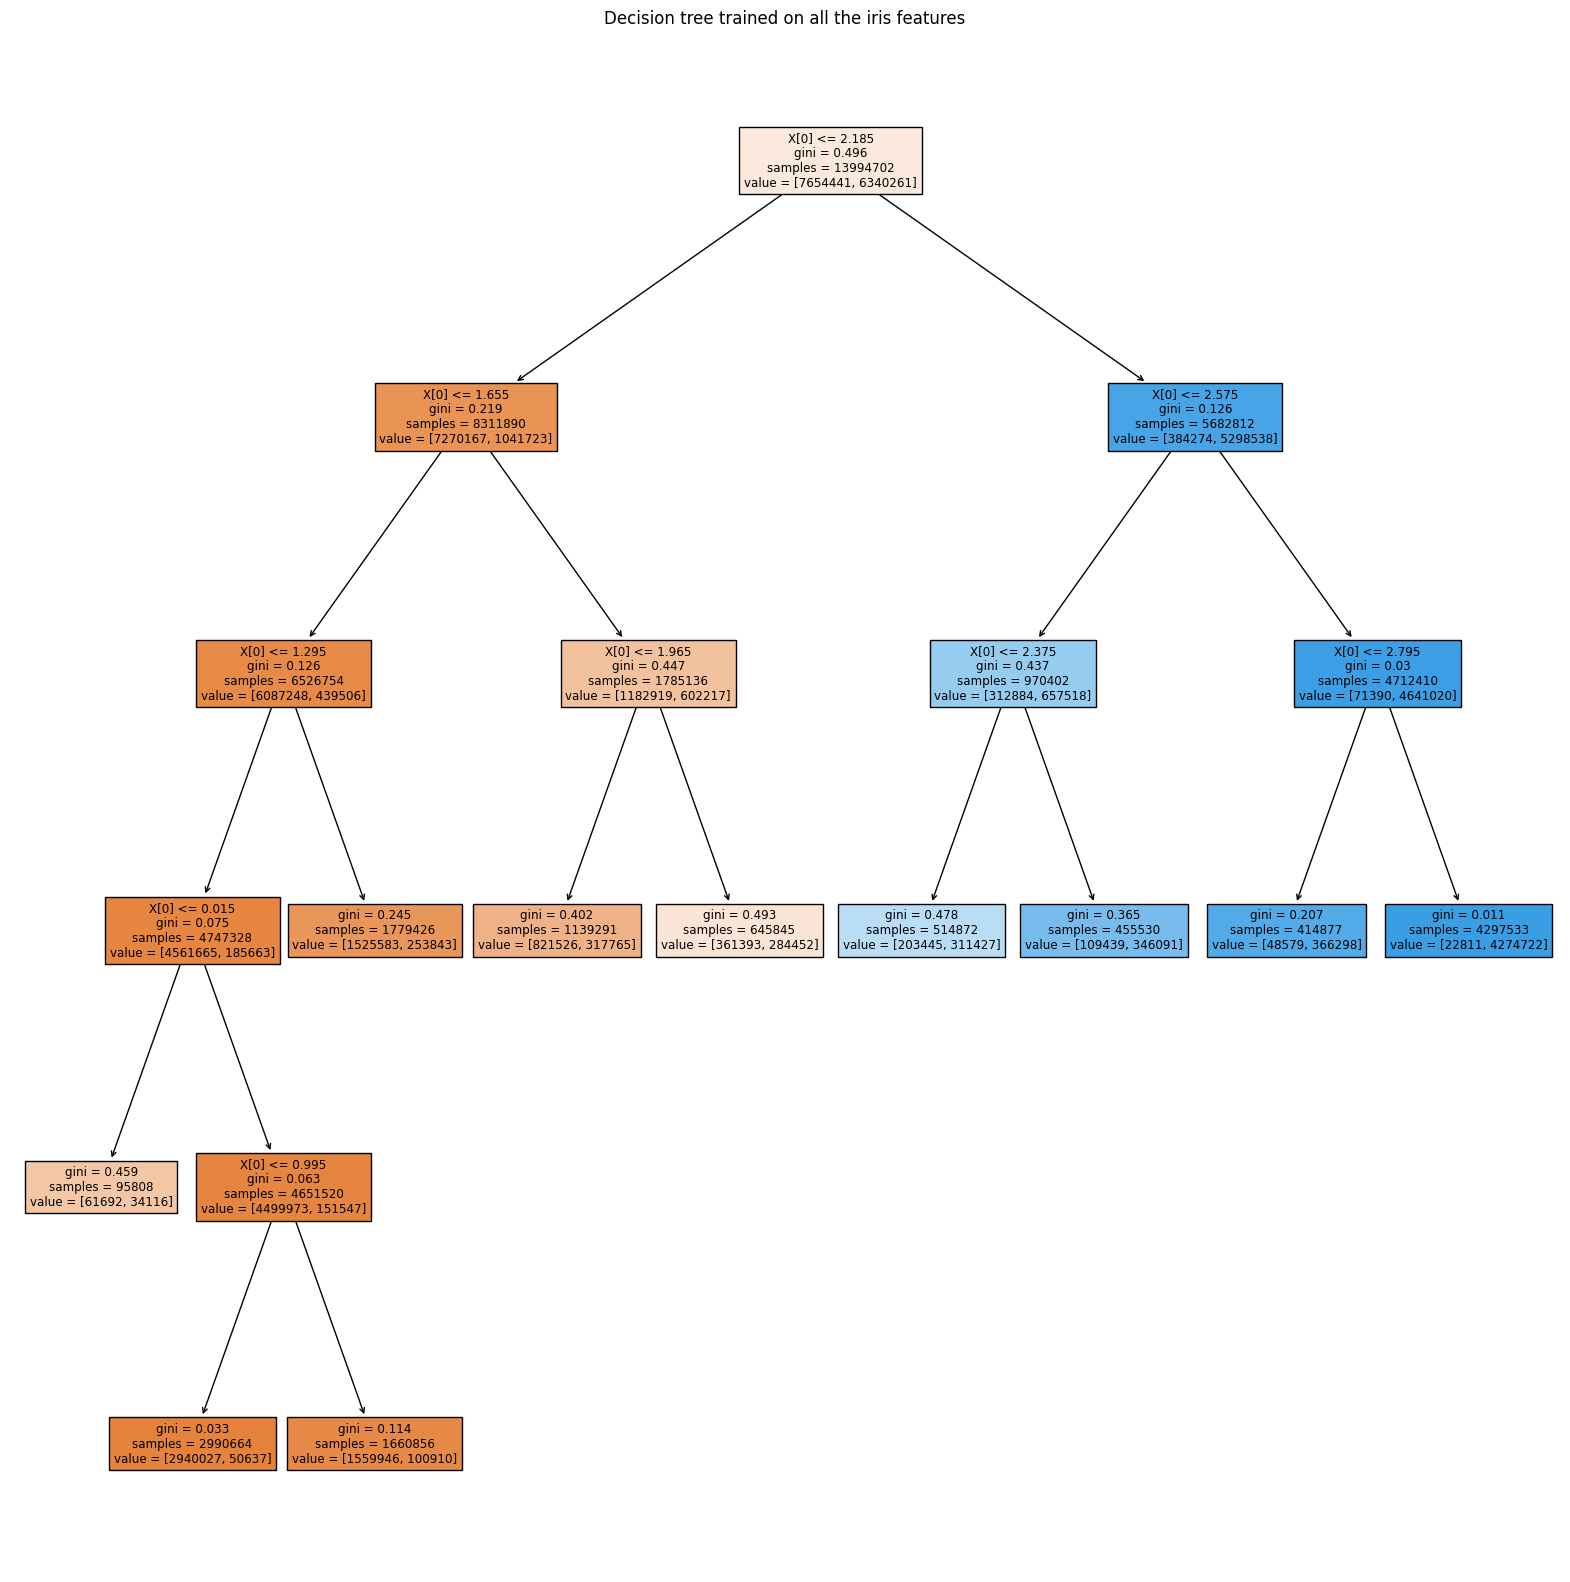

In [64]:
print(f'feature_importance: {model.feature_importances_}')
print(f'tree depth = {model.get_depth()}, number of leaf nodes = {model.get_n_leaves()}, params: {model.get_params()}')

plt.figure(figsize=(20, 20))
plot_tree(model, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [65]:
def evaluate_model(xs, ys):
    y_predicted = model.predict(xs)

    accuracy = metrics.accuracy_score(ys, y_predicted)
    precision = metrics.precision_score(ys, y_predicted)
    recall = metrics.recall_score(ys,y_predicted)

    print("--------------------------------------")
    print('Accuracy is  {}'.format(accuracy))
    print('Precision is {}'.format(precision))
    print('Recall is    {}'.format(recall))
    print("--------------------------------------")
    return accuracy, precision, recall
print("The model performance for training set")
evaluate_model(X_train, y_train)
print("The model performance for testing set")
evaluate_model(X_test, y_test)

The model performance for training set
--------------------------------------
Accuracy is  0.8981045112643342
Precision is 0.9323796036187718
Recall is    0.8356971424362498
--------------------------------------
The model performance for testing set
--------------------------------------
Accuracy is  0.899346586125084
Precision is 0.9347280044548972
Recall is    0.837767506553177
--------------------------------------


(0.899346586125084, 0.9347280044548972, 0.837767506553177)

In [66]:
y_predicted = model.predict(X_test)
# show percentage of different values
pd.Series(y_predicted).value_counts(normalize=True)

False    0.591306
True     0.408694
dtype: float64